In [56]:
import pickle
import datamaker
import streamlit as st
st.title('Streamlit + RDKit :rocket:')
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from io import BytesIO,StringIO
from functools import partial
from PIL import Image
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
import io

rfc = pickle.load(open('rf.pkl', 'rb'))
fpfunc = partial(SimilarityMaps.GetMorganFingerprint, radius=2)

def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

def getProba(fp, predctionFunction):
    return predctionFunction((fp,))[0][2]

def drawmol(mol):
    d = Draw.MolDraw2DCairo(1,1)
    im, maxWeight = SimilarityMaps.GetSimilarityMapForModel(mol,fpfunc, 
                                                           lambda x: getProba(x, rfc.predict_proba),
                                                           colorMap='coolwarm',
                                                          size=(200,200),
                                                          step=0.001,
                                                          alpha=0.2)
    return show_png(d.GetDrawingText())

In [57]:
mol = Chem.MolFromSmiles('CCC')

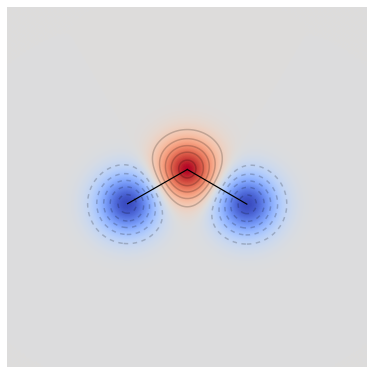

In [58]:
f =drawmol(mol)

In [59]:
type(f)

PIL.PngImagePlugin.PngImageFile

In [43]:
f.save

In [44]:
dt

"<?xml version='1.0' encoding='iso-8859-1'?>\n<svg version='1.1' baseProfile='full'\n              xmlns='http://www.w3.org/2000/svg'\n                      xmlns:rdkit='http://www.rdkit.org/xml'\n                      xmlns:xlink='http://www.w3.org/1999/xlink'\n                  xml:space='preserve'\nwidth='1px' height='1px' viewBox='0 0 1 1'>\n<!-- END OF HEADER -->\n</svg>\n"

In [50]:
bio=StringIO(dt)

In [52]:
bio

In [ ]:
Draw.MolToImage